In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

file = '/content/drive/MyDrive/Data_Mining_CMPE_255/Nifty_Bank_Data.csv'
nifty_bank_data = pd.read_csv(file)

nifty_bank_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/04/2023,"43,964.05","44,108.15","44,161.35","43,857.50",310.34M,-0.98%
1,10/03/2023,"44,399.05","44,561.50","44,566.30","44,243.10",192.65M,-0.42%
2,09/29/2023,"44,584.55","44,445.35","44,755.05","44,344.90",155.98M,0.64%
3,09/28/2023,"44,300.95","44,700.35","44,756.80","44,248.20",389.94M,-0.64%
4,09/27/2023,"44,588.30","44,465.90","44,668.00","44,182.50",221.85M,-0.08%


In [4]:
# Preprocessing the data
nifty_bank_data['Date'] = pd.to_datetime(nifty_bank_data['Date'], dayfirst=True)  # Converting to datetime
nifty_bank_data['Price'] = nifty_bank_data['Price'].str.replace(',', '').astype(float)  # Converting Price to float

# Sorting the data by Date
nifty_bank_data.sort_values('Date', inplace=True)

# Displaying the first few rows after preprocessing
nifty_bank_data.head()


<ipython-input-4-d5bbbfea6b3e>:2: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  nifty_bank_data['Date'] = pd.to_datetime(nifty_bank_data['Date'], dayfirst=True)  # Converting to datetime


,Date,Price,Open,High,Low,Vol.,Change %
2453,2013-01-11,11628.65,"11,472.20","11,694.45","11,443.60",88.55M,1.36%
2433,2013-02-12,11284.35,"11,180.30","11,347.45","11,180.30",25.88M,1.17%
2452,2013-03-11,11649.90,"11,678.70","11,691.20","11,624.80",3.27M,0.18%
2432,2013-03-12,11211.30,"11,250.70","11,310.70","11,174.50",24.26M,-0.65%
2472,2013-04-10,10197.15,"10,171.45","10,328.75","10,111.75",39.28M,-0.25%


In [6]:
#checking for datatypes
nifty_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 2453 to 14
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2473 non-null   datetime64[ns]
 1   Price     2473 non-null   float64       
 2   Open      2473 non-null   object        
 3   High      2473 non-null   object        
 4   Low       2473 non-null   object        
 5   Vol.      2469 non-null   object        
 6   Change %  2473 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 154.6+ KB


In [7]:
# Preprocessing the data
nifty_bank_data['Date'] = pd.to_datetime(nifty_bank_data['Date'], dayfirst=True)  # Converting to datetime

# Sorting the data by Date
nifty_bank_data.sort_values('Date', inplace=True)

# Displaying the first few rows after preprocessing
nifty_bank_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
2453,2013-01-11,11628.65,"11,472.20","11,694.45","11,443.60",88.55M,1.36%
2433,2013-02-12,11284.35,"11,180.30","11,347.45","11,180.30",25.88M,1.17%
2452,2013-03-11,11649.90,"11,678.70","11,691.20","11,624.80",3.27M,0.18%
2432,2013-03-12,11211.30,"11,250.70","11,310.70","11,174.50",24.26M,-0.65%
2472,2013-04-10,10197.15,"10,171.45","10,328.75","10,111.75",39.28M,-0.25%


In [8]:
# Feature Extraction: Calculating rolling average and day-to-day percentage change
nifty_bank_data['Rolling_Avg'] = nifty_bank_data['Price'].rolling(window=5).mean()  # 5-day rolling average
nifty_bank_data['Pct_Change'] = nifty_bank_data['Price'].pct_change() * 100  # Daily percentage change

# Dropping NaN values that result from rolling average calculation
nifty_bank_data.dropna(inplace=True)

# Displaying the first few rows with the new features
nifty_bank_data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Rolling_Avg,Pct_Change
2472,2013-04-10,10197.15,"10,171.45","10,328.75","10,111.75",39.28M,-0.25%,11194.27,-9.045784
2431,2013-04-12,11156.75,"11,158.70","11,216.05","11,107.75",27.83M,-0.49%,11099.89,9.410473
2451,2013-05-11,11498.90,"11,539.75","11,736.20","11,462.10",58.83M,-1.30%,11142.80,3.066753
2430,2013-05-12,11665.10,"11,469.35","11,685.55","11,469.35",55.09M,4.56%,11145.84,1.445356
2450,2013-06-11,11292.55,"11,510.40","11,510.40","11,269.95",34.78M,-1.79%,11162.09,-3.193715


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


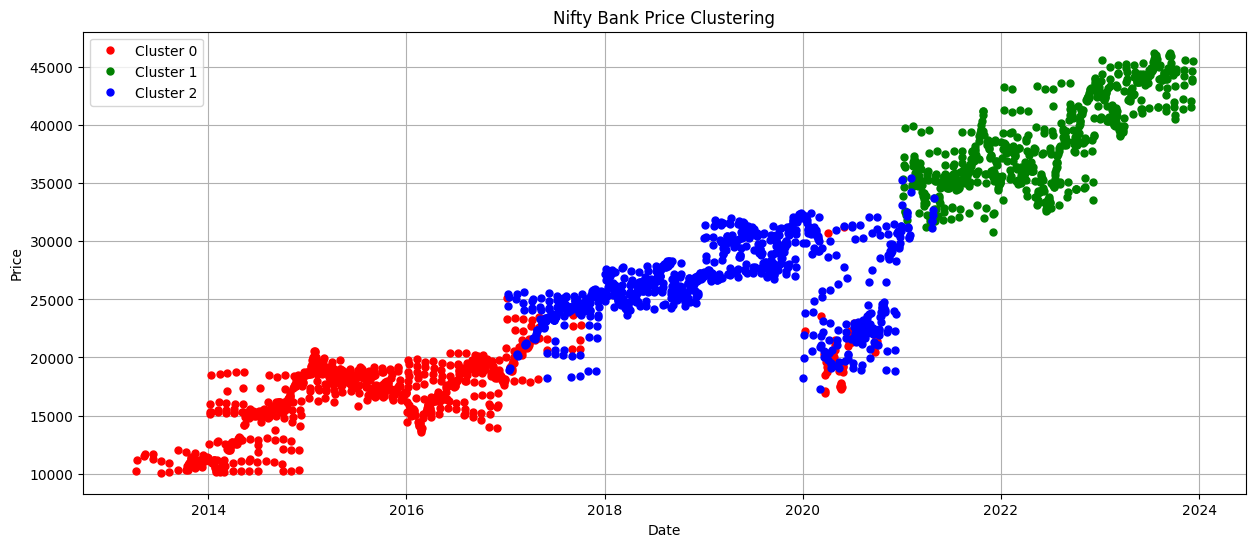

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Clustering with k-means
features = nifty_bank_data[['Rolling_Avg', 'Pct_Change']]
kmeans = KMeans(n_clusters=3, random_state=0)
nifty_bank_data['Cluster'] = kmeans.fit_predict(features)

# Visualization
plt.figure(figsize=(15, 6))
colors = ['red', 'green', 'blue']
for cluster in range(3):
    clustered_data = nifty_bank_data[nifty_bank_data['Cluster'] == cluster]
    plt.plot(clustered_data['Date'], clustered_data['Price'], marker='o', linestyle='', ms=5, color=colors[cluster], label=f'Cluster {cluster}')

plt.title('Nifty Bank Price Clustering')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()